In [68]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [67]:
def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    # You don't have to understand how this function works.
    plots.figure(figsize=(5,5))
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

## Prediction and association



The table hybrid contains data on hybrid passenger cars sold in the United States from 1997 to 2013. The data were adapted from the online data archive of Prof. Larry Winner of the University of Florida. The columns:

    vehicle: model of the car
    year: year of manufacture
    msrp: manufacturer's suggested retail price in 2013 dollars
    acceleration: acceleration rate in km per hour per second
    mpg: fuel econonmy in miles per gallon
    class: the model's class.



In [69]:
hybrid = Table.read_table('hybrid.csv')
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


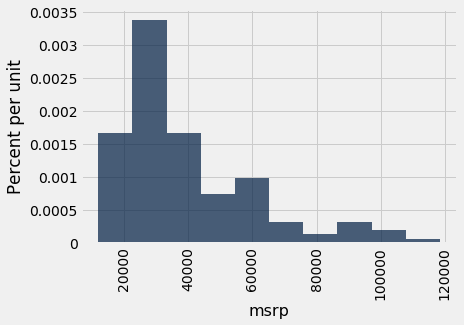

In [14]:
hybrid.hist('msrp')

In [70]:
hybrid.sort('msrp', descending=True)

vehicle,year,msrp,acceleration,mpg,class
Lexus LS600h/hL,2007,118544,17.54,21,Midsize
ActiveHybrid 7,2010,104300,20.41,22.11,Large
ActiveHybrid 7i,2011,102606,18.18,20,Midsize
ActiveHybrid X6,2009,97237.9,17.96,18.82,SUV
S400 Long,2009,96208.9,13.89,26.34,Large
Panamera S,2013,96150,18.52,25,Large
Panamera S,2012,95283.9,17.54,25,Large
S400,2013,92350,13.89,21,Large
S400,2010,88212.8,12.99,21,Large
ActiveHybrid 7L,2013,84300,18.18,25,Large


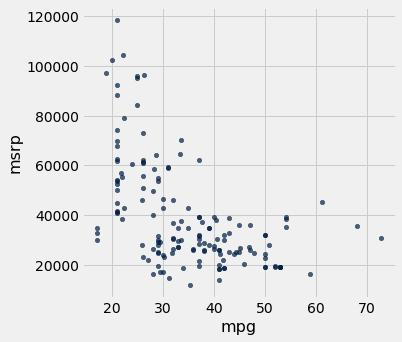

In [71]:
hybrid.scatter('mpg', 'msrp')
#The scatter diagram of MSRP versus mileage shows a negative association. 
#Hybrid cars with higher mileage tended to cost less, on average. 
#This seems surprising till you consider that cars that accelerate fast tend to be less fuel 
#efficient and have lower mileage. As the previous scatter plot showed, 
#those were also the cars that tended to cost more.

#Along with the negative association, the scatter diagram of price versus efficiency 
#shows a non-linear relation between the two variables. 
#The points appear to be clustered around a curve, not around a straight line.

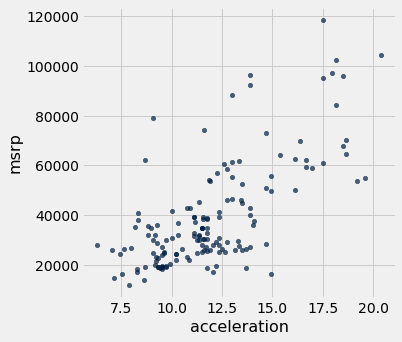

In [72]:
#The graph below is a scatter plot of msrp versus acceleration. 
#That means msrp is plotted on the vertical axis and accelaration on the horizontal.
hybrid.scatter('acceleration', 'msrp')
#Notice the positive association. The scatter of points is sloping upwards, 
#indicating that cars with greater acceleration tended to cost more, on average; conversely, 
#the cars that cost more tended to have greater acceleration on average.

In [73]:
suv = hybrid.where('class', 'SUV')
suv

vehicle,year,msrp,acceleration,mpg,class
Escape,2004,36676.1,10.32,31.99,SUV
Lexus RX400h,2005,58521.1,12.76,28.23,SUV
Highlander,2005,29186.2,12.76,29.4,SUV
Escape 2WD,2005,19322.6,9.52,29,SUV
Mercury Mariner,2006,34772.4,8.98,32.93,SUV
Chevrolet Tahoe,2007,42924.3,10.91,22.35,SUV
Kluger,2007,46229.5,12.76,25.87,SUV
Tribute,2007,24823.8,11.28,31.75,SUV
GMC Yukon,2007,57094.8,12.28,21.78,SUV
Vue,2007,22938.3,10.75,26,SUV


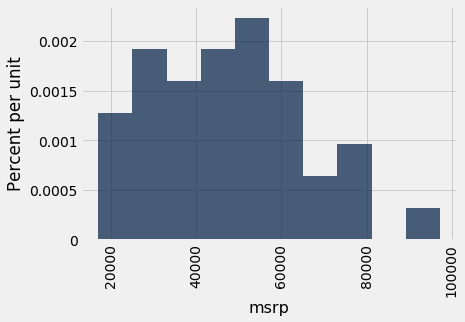

In [74]:
suv.hist('msrp')

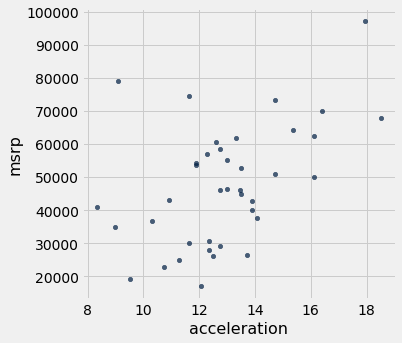

In [75]:
#If we restrict the data just to the SUV class, however, the association between price and efficiency 
#is still negative but the relation appears to be more linear. 
#The relation between the price and acceleration of SUV's also shows a linear trend, but with a positive slope.
suv.scatter('acceleration', 'msrp')

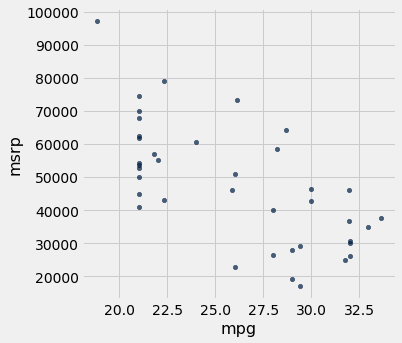

In [76]:
suv.scatter('mpg', 'msrp')

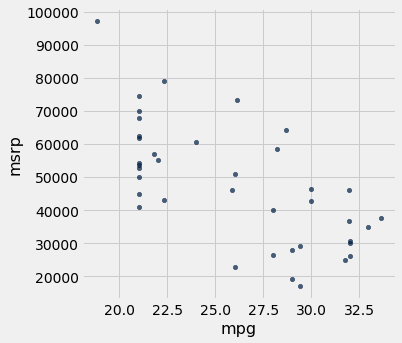

In [77]:
suv.scatter('mpg', 'msrp')

In [78]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


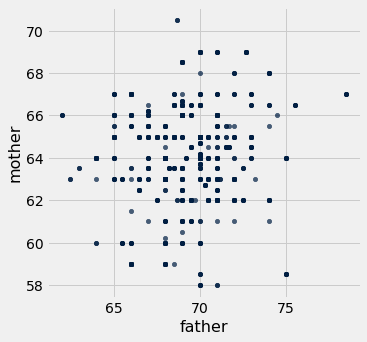

In [79]:
galton.scatter('father', 'mother')

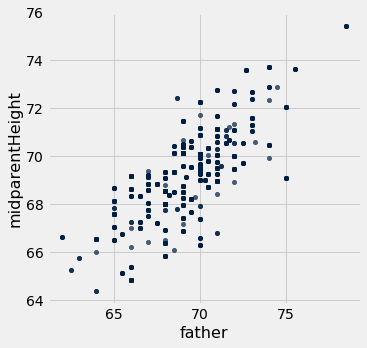

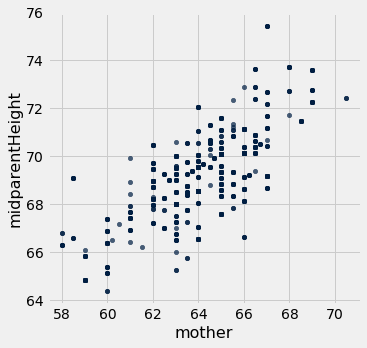

In [81]:
galton.scatter('father', 'midparentHeight')
galton.scatter('mother', 'midparentHeight')

In [82]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
)
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


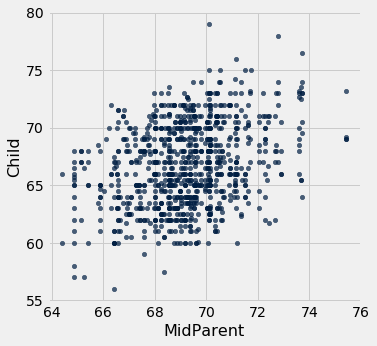

In [83]:
heights.scatter('MidParent')

In [91]:
def predict_child(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(h-0.5, h + 0.5))
    return close_points.column('Child').mean()   

In [92]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)

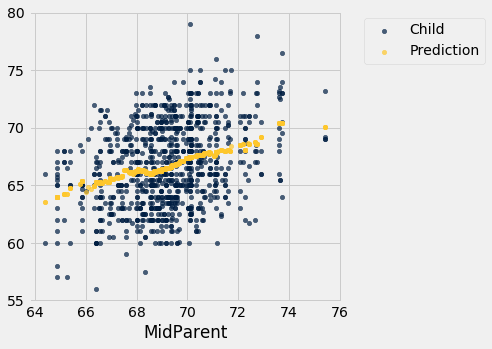

In [93]:
heights_with_predictions.scatter('MidParent')

## Association ##

In [94]:
#You will have noticed that we can derive useful information from the general orientation and 
#shape of a scatter diagram even without paying attention to the units in which the variables were measured.

#Indeed, we could plot all the variables in standard units and the plots would look the same. 
#This gives us a way to compare the degree of linearity in two scatter diagrams.

#Recall that in an earlier section we defined the function standard_units to convert an array of 
#numbers to standard units.

def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

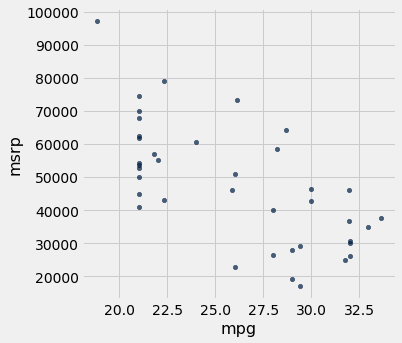

In [95]:
suv.scatter('mpg', 'msrp')

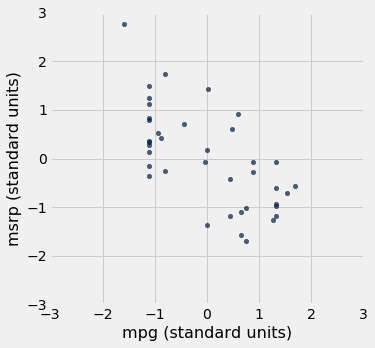

In [96]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

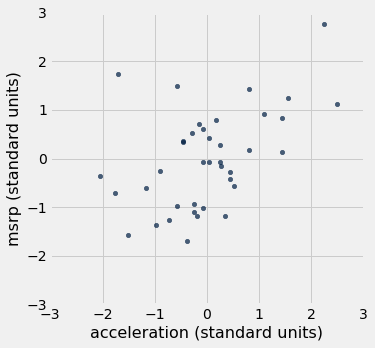

In [97]:
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

## Calculating $r$ ##

The correlation coefficient measures the strength of the linear relationship between two variables. Graphically, it measures how clustered the scatter diagram is around a straight line.

The term correlation coefficient isn't easy to say, so it is usually shortened to correlation and denoted by r
Here are some mathematical facts about r

that we will just observe by simulation.

    The correlation coefficient r

is a number between −1
and 1.
r
measures the extent to which the scatter plot clusters around a straight line.
r=1
if the scatter diagram is a perfect straight line sloping upwards, and r=−1 if the scatter diagram is a perfect straight line sloping downwards.

In [98]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


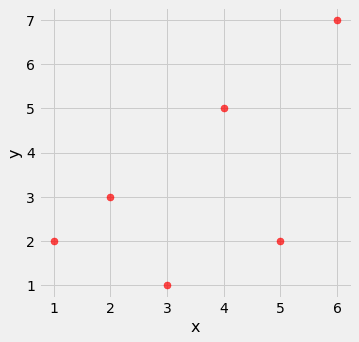

In [99]:
t.scatter('x', 'y', s=50, color='red')

In [101]:
x_su = standard_units(x)
y_su = standard_units(y)

In [102]:
t = t.with_columns(
        'x (standard units)', x_su,
        'y (standard units)', y_su
    )
t

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


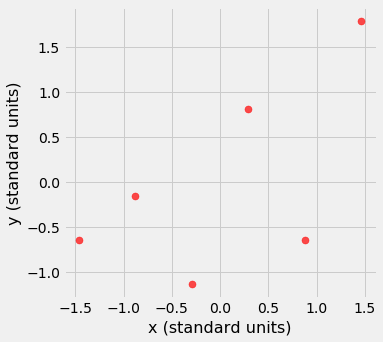

In [103]:
t.scatter(2, 3, s=50, color='red')

In [104]:
su_product = x_su * y_su

In [105]:
t = t.with_column('product of standard units', su_product)
t

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [106]:
# r is the average of the products of the standard units

r = np.average(su_product)
r

0.6174163971897709

In [107]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [108]:
correlation(t, 'x', 'y')

0.6174163971897709

In [109]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [110]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

## Correlation ##

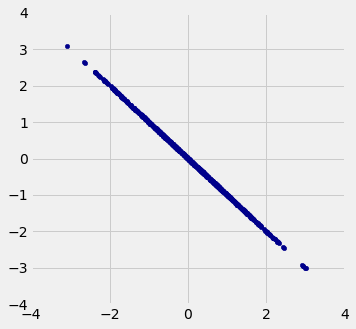

In [111]:
r_scatter(-1)

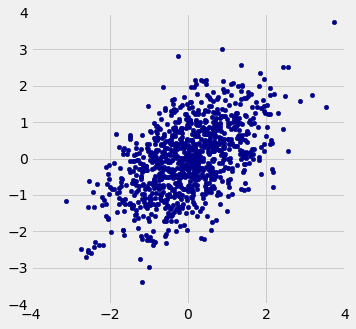

In [112]:
r_scatter(0.5)

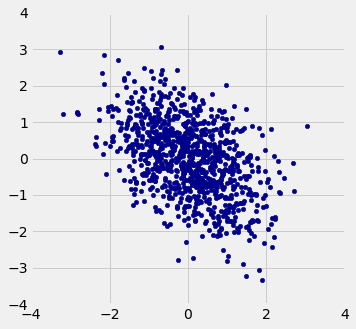

In [113]:
r_scatter(-0.5)

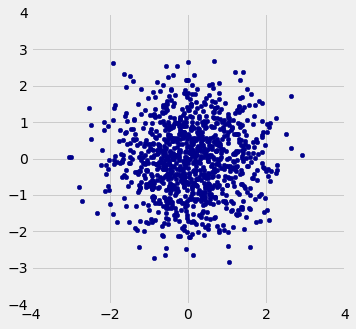

In [114]:
r_scatter(0)

### Switching Axes ###

In [115]:
correlation(t, 'x', 'y')

0.6174163971897709

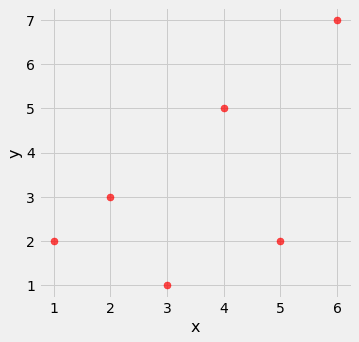

In [116]:
t.scatter('x', 'y', s=50, color='red')

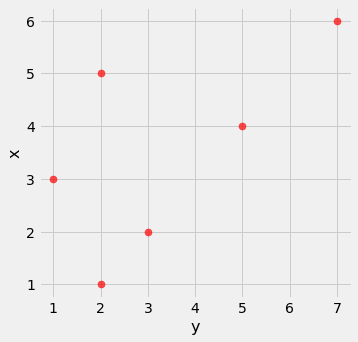

In [117]:
t.scatter('y', 'x', s=50, color='red')

In [118]:
correlation(t, 'y', 'x')

0.6174163971897709

### Nonlinearity ###

Correlation measures only one kind of association – linear. Variables that have strong non-linear association might have very low correlation. Here is an example of variables that have a perfect quadratic relation y=x^2 but have correlation equal to 0.

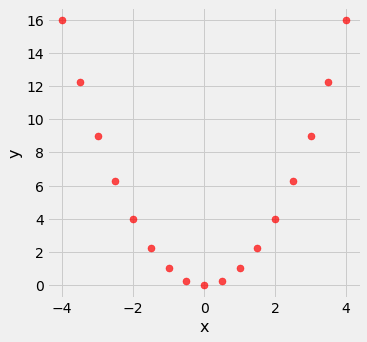

In [119]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=50, color='r')

In [120]:
correlation(nonlinear, 'x', 'y')

0.0

### Outliers ###

Outliers can have a big effect on correlation. Here is an example where a scatter plot for which r is equal to 1 is turned into a plot for which r is equal to 0, by the addition of just one outlying point.

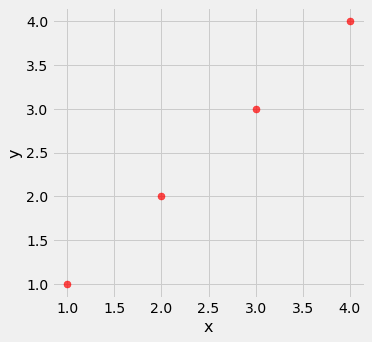

In [57]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=50, color='r')

In [58]:
correlation(line, 'x', 'y')

1.0

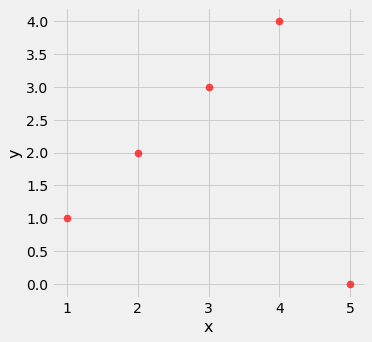

In [59]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=50, color='r')

In [60]:
correlation(outlier, 'x', 'y')

0.0

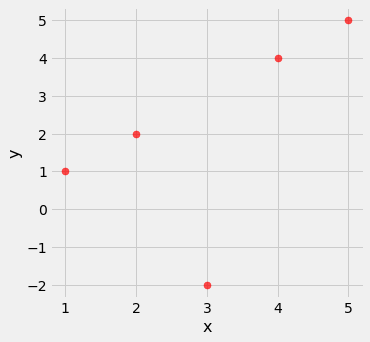

In [61]:
outlier2 = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, -2, 4, 5)
    )
outlier2.scatter('x', 'y', s=50, color='r')

In [62]:
correlation(outlier2, 'x', 'y')

0.5773502691896258

### Ecological correlations

Correlations based on aggregates and averages are called ecological correlations and are frequently reported. They must be interpreted with care.


In [121]:
election16 = Table.read_table('election2016_state.csv')
election16

State,Median Income,Percent voting for Clinton
Alabama,47221,0.343579
Alaska,75723,0.365509
Arizona,57100,0.45126
Arkansas,45907,0.336519
California,66637,0.617264
Colorado,70566,0.481565
Connecticut,75923,0.545663
Delaware,58046,0.53086
Florida,51176,0.478233
Georgia,53527,0.4564


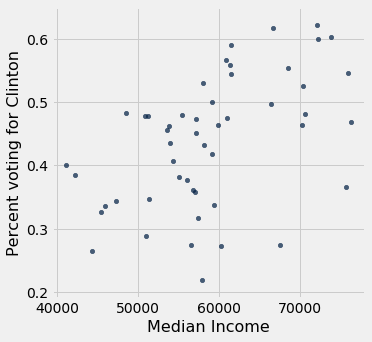

In [122]:
election16.scatter('Median Income', 'Percent voting for Clinton')

In [124]:
party = Table.read_table('party_affiliation2016.csv')
party

Income,Republican%,Democrat%,No leaning%
"Below 30,000",32,60,8
"30,000 to 39,999",47,46,7
"50,000 to 74,999",49,44,6
"75,000 to 99,999",48,44,8
"40,000 to 49,999",47,46,7
"100,000 to 149,999",51,45,4
"Above 150,000",46,48,6


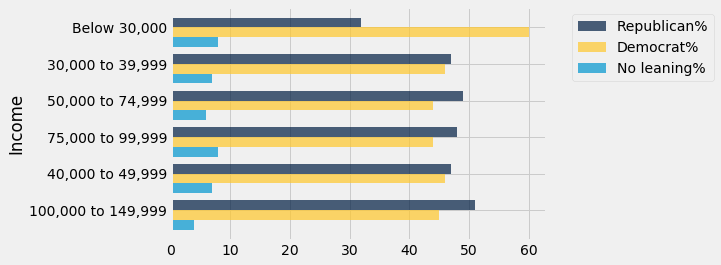

In [125]:
party.exclude(6).barh('Income')

In [127]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014.show(4)

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698


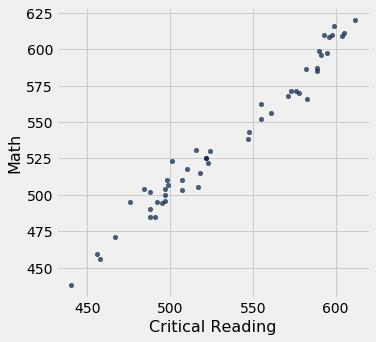

In [128]:
sat2014.scatter('Critical Reading', 'Math')

The data consist of average scores in each state. But states don't take tests – students do. The data in the table have been created by lumping all the students in each state into a single point at the average values of the two variables in that state. But not all students in the state will be at that point, as students vary in their performance. If you plot a point for each student instead of just one for each state, there will be a cloud of points around each point in the figure above. The overall picture will be more fuzzy. The correlation between the Math and Critical Reading scores of the students will be lower than the value calculated based on state averages.

In [129]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434